In [53]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks as fp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [54]:
filep = "sEMG-dataset//raw//csv//1_raw.csv"
data =  pd.read_csv(filep,
                    #sep = "\t",
                    #header = None, 
                    names = ["ch" + str(i) for i in range(1, 5)] # 4 input channels
                        )

In [55]:
#src = pd.read_csv("sEMG-dataset//raw//csv//1_raw.csv")

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280000 entries, 0 to 1279999
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   ch1     1280000 non-null  float64
 1   ch2     1280000 non-null  float64
 2   ch3     1280000 non-null  float64
 3   ch4     1280000 non-null  float64
dtypes: float64(4)
memory usage: 39.1 MB


In [57]:
data.head()

,ch1,ch2,ch3,ch4
0,8.458862,-4.467468,7.217712,0.019226
1,8.465576,-4.466553,7.217102,0.019531
2,8.467407,-4.466553,7.214050,0.020447
3,8.469238,-4.464722,7.217407,0.021973
4,8.464355,-4.467773,7.214966,0.018616


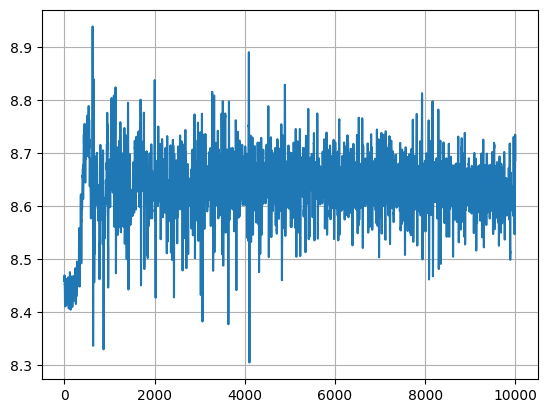

In [58]:
plt.plot(data.ch1[:10000])
plt.grid()

In [59]:
### Domain Specified Pre-Processing- we will take the rectified EMG signals as we dont care about the negative spikes.

data["ch1"]=abs(data["ch1"])


In [60]:
data

,ch1,ch2,ch3,ch4
0,8.458862,-4.467468,7.217712,0.019226
1,8.465576,-4.466553,7.217102,0.019531
2,8.467407,-4.466553,7.214050,0.020447
3,8.469238,-4.464722,7.217407,0.021973
4,8.464355,-4.467773,7.214966,0.018616
...,...,...,...,...
1279995,7.677917,-3.158569,5.378113,0.000000
1279996,7.694397,-3.151550,5.379028,0.001221
1279997,7.703247,-3.152161,5.381470,0.002441
1279998,7.700195,-3.157043,5.379028,0.003357


In [26]:
!pip install vmdpy

In [69]:
T = 10000
fs = 1/T  
t = np.arange(1,T+1)/T  

f_1 = 20

v_1 = (np.cos(2*np.pi*f_1*t))

data["ch1"][:10000] = data["ch1"][:10000] + v_1 

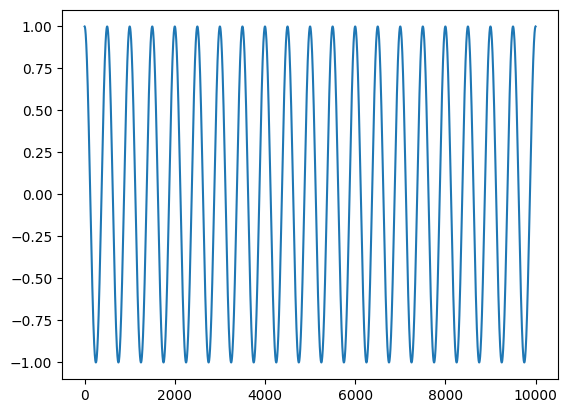

In [70]:
plt.plot(v_1)

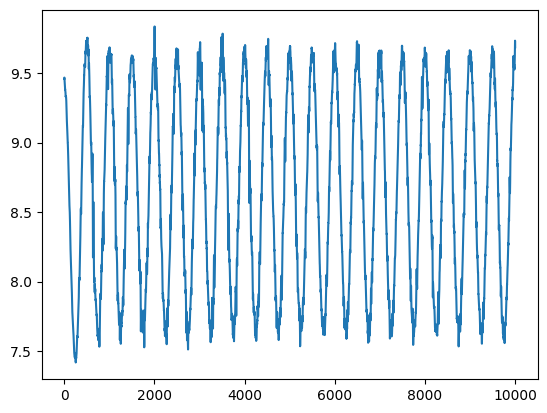

In [64]:
plt.plot(data.ch1[:10000])

In [65]:
from vmdpy import VMD

In [66]:
#. some sample parameters for VMD  
alpha = 5000      # moderate bandwidth constraint  
tau = 0           # noise-tolerance (no strict fidelity enforcement)  
K = 2              # 2 modes 
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-7

In [67]:
u, u_hat, omega = VMD(data.ch1[:10000], alpha, tau, K, DC, init, tol)

<Figure size 640x480 with 0 Axes>

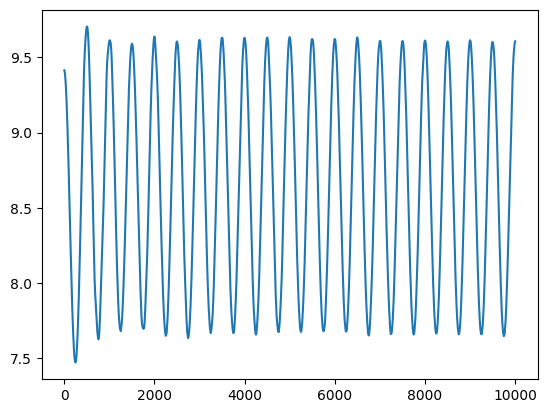

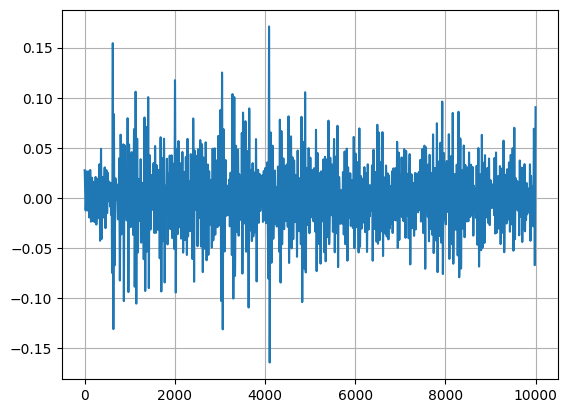

<Figure size 640x480 with 0 Axes>

In [75]:
plt.plot()
plt.figure()
plt.grid()
plt.plot(u[1])
plt.figure()


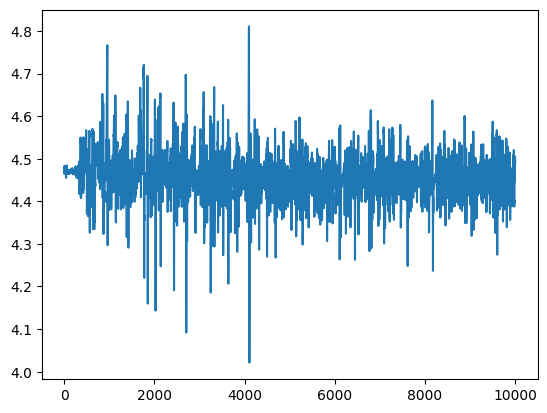

In [77]:
plt.plot(abs(data.ch2[:10000]))

In [78]:
u_2, u_hat_2, omega_2 = VMD(abs(data.ch2[:10000]), alpha, tau, K, DC, init, tol)

<Figure size 640x480 with 0 Axes>

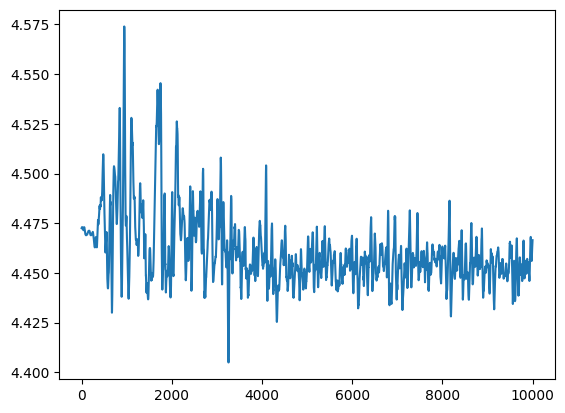

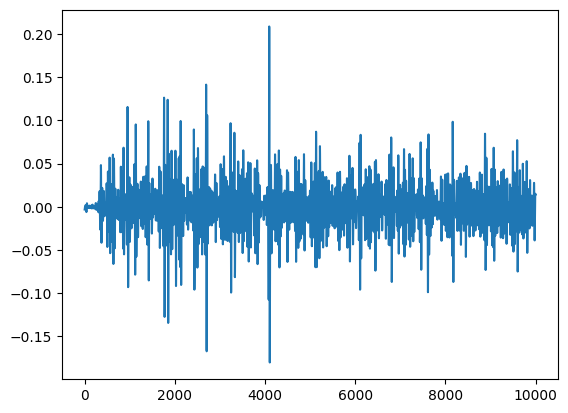

<Figure size 640x480 with 0 Axes>

In [81]:
plt.plot(u_2[0])
plt.figure()
plt.plot(u_2[1])
plt.figure()
#plt.grid()

In [97]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)
snr_org = signaltonoise(abs(data.ch2[:10000]))
snr_org

array(84.10273466)

In [101]:
snr_filtered = signaltonoise(u_2[0])
snr_filtered

array(244.26034625)

In [102]:
signal_added_noise = signaltonoise(data.ch1[:10000])
round(np.mean(signal_added_noise),3)

6.078

In [103]:
signal_no_noise_ch1 = signaltonoise(u[0])
round(np.mean(signal_no_noise_ch1),3)

12.416

In [104]:
ch1_org = signaltonoise(abs(data.ch1[10000:]))
round(np.mean(ch1_org),3)

15.388